In [1]:
!which python


/Users/saiha/opt/anaconda3/envs/churn-model/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#standard imports
import os
import pickle
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
import sklearn

from src.localpath import *
from src.data.make_dataset import load_training_data
from src.models.train_model import *

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
AdaBoostClassifier,
GradientBoostingClassifier,
RandomForestClassifier,


)
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve

In [4]:
#Configuration for Jupyter Notebooks
pd.options.display.max_columns=100
pd.options.display.max_rows=100

# Load Featurized  Data

In [5]:
X_train,y_train=load_training_data(final=True)

# Load model results

In [6]:
model_results=load_model_results()

In [7]:
model_results.sort_values(by="roc_auc",ascending = False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
4,978465313962498816.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
1,1153113127975622144.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
3,1862026831261351680.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.671295,0.515827,0.582726,0.844507
2,2232346669262199552.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.778111,0.603356,0.458273,0.525206,0.810954
0,652182741139790080.pkl,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.728512,0.478483,0.481295,0.479332,0.660695


# Load our Final model 

In [8]:
model=load_pickled_model('978465313962498816.pkl')

In [10]:
most_important_features=sorted(zip(X_train.columns,model.feature_importances_),key= lambda x:x[1],reverse=True)
most_important_features

[('tenure', 0.46),
 ('MultipleLines_Yes', 0.06),
 ('PaymentMethod_Electronic check', 0.06),
 ('MultipleLines_No phone service', 0.04),
 ('OnlineSecurity_Yes', 0.04),
 ('StreamingTV_Yes', 0.04),
 ('StreamingMovies_No internet service', 0.04),
 ('StreamingMovies_Yes', 0.04),
 ('Contract_One year', 0.04),
 ('Contract_Two year', 0.04),
 ('SeniorCitizen', 0.02),
 ('Dependents', 0.02),
 ('PaperlessBilling', 0.02),
 ('InternetService_Fiber optic', 0.02),
 ('OnlineBackup_Yes', 0.02),
 ('TechSupport_Yes', 0.02),
 ('PaymentMethod_Mailed check', 0.02),
 ('gender', 0.0),
 ('Partner', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0)]

# Look at partital dependence plots
we are going to look at these plots to determine the direction of influence of each of these features

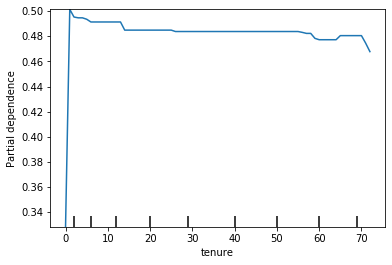

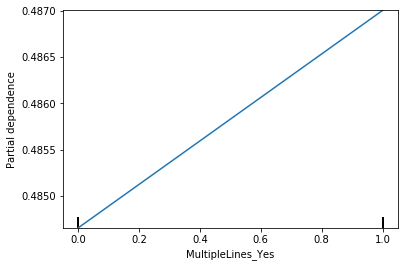

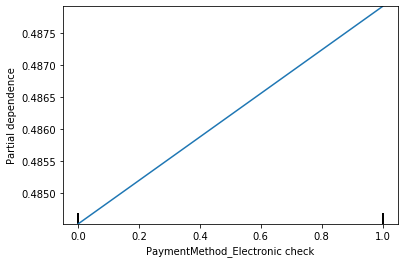

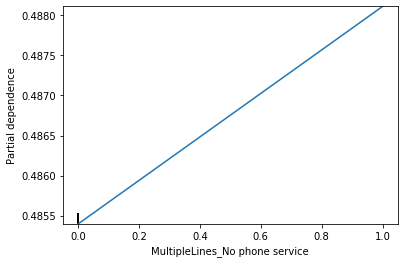

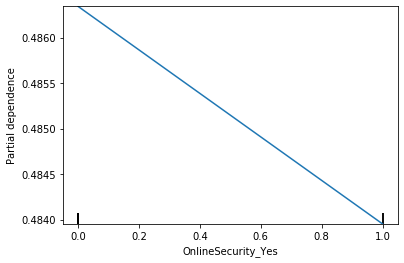

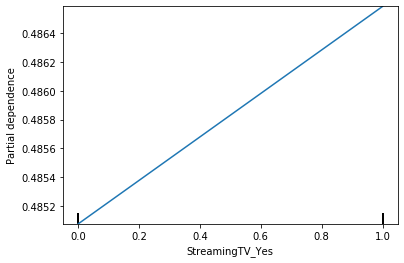

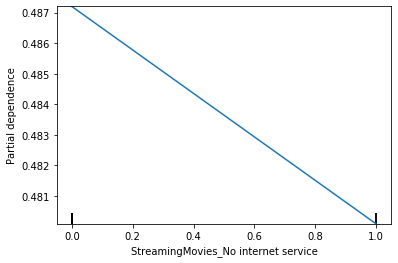

In [11]:
for col, _ in most_important_features[:7]:
    plot_partial_dependence(model,X_train,[col])

# Visualise model training
In this section, we are going to use **learning curves** to visualise the training models to explore overfitting and underfitting

# Learning Curves

In [88]:
train_sizes,train_scores,test_scores=learning_curve(model,X_train,y_train)


/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A 

In [89]:
train_sizes

array([ 422, 1373, 2323, 3274, 4225])

In [90]:
train_scores=np.mean(train_scores,axis=1)

In [91]:
test_scores=np.mean(test_scores,axis=1)

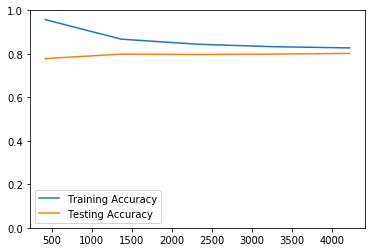

In [92]:
plt.plot(train_sizes,train_scores,label='Training Accuracy')
plt.plot(train_sizes,test_scores,label="Testing Accuracy")
plt.ylim(0,1)
_=plt.legend()


# Inspect a classic case of overfitting

In [93]:
dt=load_pickled_model("2063055419843484160.pkl")

In [94]:
train_sizes,train_scores,test_scores=learning_curve(dt,X_train,y_train)
train_scores=np.mean(train_scores,axis=1)
test_scores=np.mean(test_scores,axis=1)

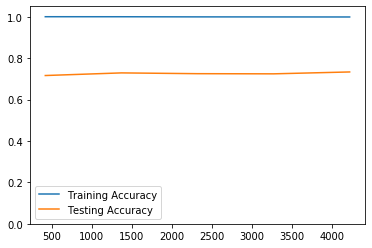

In [95]:
plt.plot(train_sizes,train_scores,label='Training Accuracy')
plt.plot(train_sizes,test_scores,label="Testing Accuracy")
plt.ylim(0,1.05)
_=plt.legend()


# Visualise model results
In this section, we are going to use **ROC curves** to visualise the performance of classification models

# ROC Curves

In [101]:
X_train_subset, X_validation, y_train_subset, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [102]:
model.fit(X_train_subset,y_train_subset)

/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [103]:
y_score=model.predict_proba(X_validation)
y_score=y_score[:,1]

In [104]:
fpr,tpr,thresholds= roc_curve(y_validation,y_score)

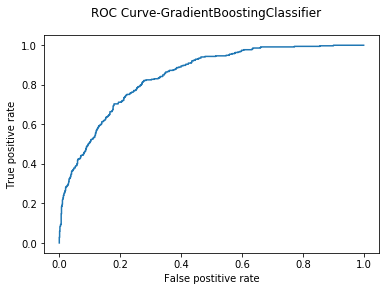

In [105]:
plt.plot(fpr,tpr)
plt.xlabel("False postitive rate")
plt.ylabel("True positive rate")
_=plt.suptitle(f"ROC Curve-{type(model).__name__}")

In [10]:
models_to_train

[sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.ensemble._weight_boosting.AdaBoostClassifier,
 sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.ensemble._gb.GradientBoostingClassifier]

### Plot ROC Curves for all models

In [111]:
X_train_subset, X_validation, y_train_subset, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-114-d58958c2d320>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_subset,y_train_subset)
/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


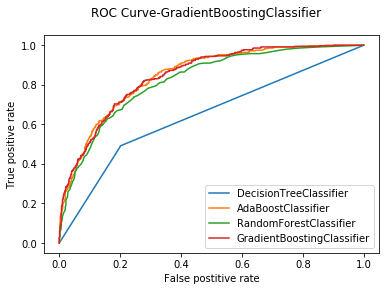

In [114]:
for model_class in models_to_train:
    model=model_class()
    model.fit(X_train_subset,y_train_subset)
    y_score=model.predict_proba(X_validation)
    y_score=y_score[:,1]
    fpr,tpr,thresholds= roc_curve(y_validation,y_score)
    plt.plot(fpr,tpr,label=f"{type(model).__name__}")
    plt.xlabel("False postitive rate")
    plt.ylabel("True positive rate")
    plt.suptitle(f"ROC Curve-{type(model).__name__}")
    
_=plt.legend()

# Train model again now that high vif columns are dropped

In [3]:
X_train,y_train=load_training_data(final=True)

In [4]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,0,1,0,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,1,0,1,1,23,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5279,0,0,1,1,12,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5280,0,1,0,0,12,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
for model_class in models_to_train:
    print(model_class.__name__)
    model=model_class()
    store_model_and_results(model,X_train,y_train)
    print_model_results(model,X_train,y_train)

DecisionTreeClassifier
fitting model before pickling
Saving model to 652182741139790080.pkl
model results file doesnot exist -- creating new model results CSV file and writing results
accuracy:0.73
precision:0.48
recall:0.48
f1:0.47
roc_auc:0.66
AdaBoostClassifier
fitting model before pickling
Saving model to 1153113127975622144.pkl
writing model results to existing results csv file


/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:0.80
precision:0.65
recall:0.52
f1:0.58
roc_auc:0.84
RandomForestClassifier
fitting model before pickling


../src/models/train_model.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Saving model to 2232346669262199552.pkl
writing model results to existing results csv file
accuracy:0.78
precision:0.60
recall:0.46
f1:0.52
roc_auc:0.81
GradientBoostingClassifier
fitting model before pickling


/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saving model to 1862026831261351680.pkl
writing model results to existing results csv file
accuracy:0.81
precision:0.67
recall:0.52
f1:0.58
roc_auc:0.84


# Load model results

In [12]:
model_results=load_model_results()

In [13]:
model_results.sort_values(by="roc_auc",ascending = False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
1,1153113127975622144.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
3,1862026831261351680.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.671295,0.515827,0.582726,0.844507
2,2232346669262199552.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.778111,0.603356,0.458273,0.525206,0.810954
0,652182741139790080.pkl,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.728512,0.478483,0.481295,0.479332,0.660695
